In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [ ]:
df_train = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
df_train.head()

In [ ]:

df_train.info()

In [ ]:
df_train.drop(columns=['keyword' , 'location'] , inplace = True)

In [ ]:


df_train.info()

In [ ]:
df_train.shape

In [ ]:
len(df_train['text'])

In [ ]:
df_train['target'].value_counts()

In [ ]:

# Use RegEx to clean the code

import re , string

def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)

    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r'\s+', ' ', text)
    return text 
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute


df_train['text'] = df_train['text'].apply(lambda x : remove_url(x))
df_train['text'] = df_train['text'].apply(lambda x : remove_punct(x))
df_train['text'] = df_train['text'].apply(lambda x : remove_emoji(x))
df_train['text'] = df_train['text'].apply(lambda x : decontraction(x))
df_train['text'] = df_train['text'].apply(lambda x : seperate_alphanumeric(x))
df_train['text'] = df_train['text'].apply(lambda x : unique_char(cont_rep_char,x))


In [ ]:
import re

corpus = []
for i in range(0 , len(df_train['text'])):
    review = str(df_train['text'][i])
    review = review.lower()
    corpus.append(review)  

In [ ]:
len(corpus)

In [ ]:
### for nltk downloads for using lemmatize


%pwd 
%cd /
%cd usr/share/nltk_data/corpora
%ls (check if wordnet.zip is there)
! unzip "/usr/share/nltk_data/corpora/wordnet.zip"

In [ ]:
len(df_train['text'])



In [ ]:
len(corpus)

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk

lemmatize = WordNetLemmatizer()
for i in range(len(df_train['text'])):
    words = nltk.word_tokenize(corpus[i])
    words = [lemmatize.lemmatize(word) for word in words]
    corpus[i] = ' '.join(words)

    

In [ ]:
corpus[0]

In [ ]:


import nltk
nltk.download('wordnet')

In [ ]:
stopwords = ['i' , 'you' , 'u' , 'this' , 'the' , 'm' , 'am' , 'in' , 'on' , 'did' , 'may' ,]


In [ ]:
for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words = [word for word in words if word not in stopwords]
    corpus[i] = ' '.join(words)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df = 0.80)
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

In [ ]:
df_tf =pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())

In [ ]:
df_tf

In [ ]:
from sklearn.model_selection import train_test_split

trainx ,testx , trainy , testy = train_test_split(df_tf , df_train['target'] , random_state = 0  , test_size = 0.25)
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:



param={'n_estimators':[200],
       'max_depth':np.arange(9 , 15),
     'learning_rate': [0.01] }


gs=GridSearchCV(XGBClassifier(),param,cv=3,n_jobs=-1)
gs.fit(trainx,trainy)

In [ ]:
dhfjh

In [ ]:
gs.best_params_

In [ ]:
gs.best_score_

In [ ]:
df_test.drop(columns=['keyword' , 'location'] , inplace = True )

In [ ]:
import re

corpus = []
for i in range(0 , len(df_test['text'])):
    review = re.sub(r'\W', ' ', str(df_test['text'][i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'^[a-z]\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)  

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk

lemmatize = WordNetLemmatizer()
for i in range(len(df_test['text'])):
    words = nltk.word_tokenize(corpus[i])
    words = [lemmatize.lemmatize(word) for word in words]
    corpus[i] = ' '.join(words)


In [ ]:
corpus[0]

In [ ]:
stopwords = ['i' , 'you' , 'u' , 'this' , 'the' , 'm' , 'am' , 'in' , 'on' , 'did' , 'may' ,]

for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words = [word for word in words if word not in stopwords]
    corpus[i] = ' '.join(words)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer(max_df = 0.65)
X = vectorizer.transform(corpus).toarray()
vectorizer.get_feature_names_out()

In [ ]:
len(vectorizer.get_feature_names_out())

In [ ]:
df_test_tf  = df_tf =pd.DataFrame(X,columns=vectorizer.get_feature_names_out())

In [ ]:
df_test_tf.head()

In [ ]:
df_test_tf.shape

In [ ]:
df_tf.shape

In [ ]:
##Dataloader
class loader(Dataset):
    def __init__(self , X):
        self.x = torch.from_numpy(X.values.astype(np.float32))
#         self.y = torch.from_numpy(Y.values.astype(np.float32))
        self.n_samples = self.x.shape[0]
        
    def __getitem__(self , index):
        return self.x[index] , self.y[index]
            
    def __len__(self):
        return self.n_samples

In [ ]:
test = loader(df_test_tf , )
testdataloader = DataLoader(test, batch_size = 1)

In [ ]:
##val accuracy
correct = 0

model.eval() # prep model for evaluation

for data, target in valdataloader:
    output = ml(data)
    output = output.item()
    if output > 0.5 :
      output = 1 
    else :
      output = 0

    df_test['predict'] = output
df_test.head()
    

In [ ]:
df_test.predict.unique()

In [ ]:
df_test.columns = ['id' , 'text' , 'target']  

In [ ]:
submission = df_test[['id' , 'target']].copy()

In [ ]:
submission.to_csv('/kaggle/working/submission.csv' , index = False)

In [ ]:
## Lets experiment with Tensorflow LSTM ####

In [3]:

import numpy  as np
import pandas as pd

df_train  = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df_train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

<Axes: >

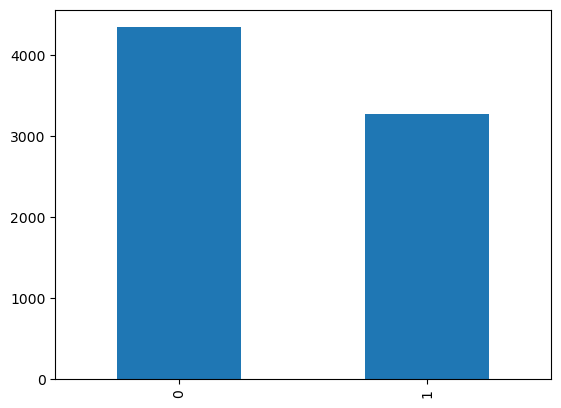

In [5]:
df_train['target'].value_counts().plot(kind= 'bar')

In [6]:
# Use RegEx to clean the code

import re , string

def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)

    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r'\s+', ' ', text)
    return text 
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute


df_train['text'] = df_train['text'].apply(lambda x : remove_url(x))
df_train['text'] = df_train['text'].apply(lambda x : remove_punct(x))
df_train['text'] = df_train['text'].apply(lambda x : remove_emoji(x))
df_train['text'] = df_train['text'].apply(lambda x : decontraction(x))
df_train['text'] = df_train['text'].apply(lambda x : seperate_alphanumeric(x))
df_train['text'] = df_train['text'].apply(lambda x : unique_char(cont_rep_char,x))

In [7]:
df_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to shelter in place are be...,1
3,6,NaN,NaN,1300 people receive wildfires evacuation order...,1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,ariaahrary TheTawniest The out of control wild...,1
7610,10871,NaN,NaN,M 194 0104 UTC 5 km S of Volcano Hawaii,1
7611,10872,NaN,NaN,Police investigating after an ebike collided w...,1


In [8]:
import nltk

nltk.download("stopwords")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
### for nltk downloads for using lemmatize


%pwd 
%cd /
%cd usr/share/nltk_data/corpora
%ls (check if wordnet.zip is there)
! unzip "/usr/share/nltk_data/corpora/wordnet.zip"

/
/usr/share/nltk_data/corpora
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `ls -F --color (check if wordnet.zip is there)'
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: wordnet/
  inflating: wordnet/lexnames        
  inflating: wordnet/data.verb       
  inflating: wordnet/index.adv       
  inflating: wordnet/adv.exc         
  inflating: wordnet/index.verb      
  inflating: wordnet/cntlist.rev     
  inflating: wordnet/data.adj        
  inflating: wordnet/index.adj       
  inflating: wordnet/LICENSE         
  inflating: wordnet/citation.bib    
  inflating: wordnet/noun.exc        
  inflating: wordnet/verb.exc        
  inflating: wordnet/README          
  inflating: wordnet/index.sense     
  inflating: wordnet/data.noun       
  inflating: wordnet/data.adv        
  inflating: wordnet/index.noun      
  inflating: wordnet/adj.exc         


In [10]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

In [11]:
import re

corpus = []
for i in range(0 , len(df_train['text'])):
    review = str(df_train['text'][i])
    review = review.lower()
    corpus.append(review)  

In [12]:
from nltk.stem import WordNetLemmatizer
import nltk

lemmatize = WordNetLemmatizer()
for i in range(len(df_train['text'])):
    words = nltk.word_tokenize(corpus[i])
    words = [lemmatize.lemmatize(word) for word in words]
    corpus[i] = ' '.join(words)

In [13]:
for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words = [word for word in words if word not in stopwords]
    corpus[i] = ' '.join(words)

In [14]:
df_train['text'] = corpus

In [15]:
from collections import Counter

# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count


counter = counter_word(df_train.text)


In [16]:
print(len(counter))
num_unique_words = len(counter)

16069


In [17]:
counter.most_common(10)

[('û', 438),
 ('wa', 393),
 ('fire', 352),
 ('like', 347),
 ('amp', 302),
 ('im', 301),
 ('2', 257),
 ('ha', 256),
 ('u', 255),
 ('get', 255)]

In [18]:
from sklearn.model_selection import train_test_split

trainx , testx , trainy ,testy  = train_test_split(df_train['text'] , df_train['target'] , test_size =0.25 , random_state = 123)
print(trainx.shape)
print(trainy.shape)
print(testx.shape)
print(testy.shape)

(5709,)
(5709,)
(1904,)
(1904,)


In [19]:
trainx.head()

1750    motorcyclist bicyclist injured denver collisio...
6995    ellenfromnowon 7 speed nexus shifter å 9 commu...
5577    landslide caused severe rainstorm kill 3 itali...
252     kimkardashian please sign share petition save ...
5628    yall read 1200 nigerian refugee repatriated ca...
Name: text, dtype: object

In [20]:
# split text and labels
train_sentences = trainx.to_numpy()
train_labels = trainy.to_numpy()
val_sentences = testx.to_numpy()
val_labels = testy.to_numpy()

In [21]:
train_sentences.shape, val_sentences.shape

((5709,), (1904,))

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer  = Tokenizer(num_words = num_unique_words )
tokenizer.fit_on_texts(train_sentences)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [23]:
word_index  = tokenizer.word_index

In [24]:
train_sequences  = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)

In [25]:
print(train_sentences[10:15])
print(train_sequences[10:15])

['shawie 17 shawie breaking news unconfirmed heard loud bang nearby appears blast wind neighbour'
 'family sue legionnaire 40 family affected fatal outbreak legionnaire disea'
 'cutting celebrety posting wound online nogo'
 'exquisite asian sto cumshot sex porn video porno free'
 'hw 18 going 90100 dude wa keeping took exit pulled side told blew motor lolol 2 fast 2 furious']
[[3397, 450, 3397, 317, 15, 1174, 541, 257, 451, 691, 936, 452, 179, 1175], [39, 631, 158, 303, 39, 542, 138, 318, 158, 937], [5130, 5131, 2633, 367, 577, 5132], [5133, 2115, 3398, 5134, 938, 2116, 20, 5135, 180], [5136, 632, 64, 5137, 939, 2, 5138, 1176, 1609, 5139, 578, 874, 409, 2117, 3399, 7, 770, 7, 2634]]


In [26]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length  =  35
train_pad_sequences = pad_sequences(train_sequences ,  maxlen = 35 , padding = 'post' , truncating = 'post')
val_pad_sequences = pad_sequences(val_sequences , maxlen = 35 , padding = 'post' , truncating = 'post')

In [27]:
print(train_sentences[0])
print()
print(train_sequences[0])
print()
print(train_pad_sequences[0])

motorcyclist bicyclist injured denver collision broadway least two people taken local û

[1421, 1422, 147, 1172, 336, 1608, 365, 75, 14, 935, 1280, 1]

[1421 1422  147 1172  336 1608  365   75   14  935 1280    1    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]


In [28]:
reverse_dict =  dict([(idx , word) for (word , idx) in word_index.items()])

In [29]:
def decode_sequence(sequence):
    return " ".join(reverse_dict.get(idx , "?") for idx in sequence)

In [30]:
decoded_text = decode_sequence(train_sequences[10])

print(train_sequences[10])
print(decoded_text)


[3397, 450, 3397, 317, 15, 1174, 541, 257, 451, 691, 936, 452, 179, 1175]
shawie 17 shawie breaking news unconfirmed heard loud bang nearby appears blast wind neighbour


In [31]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.models.Sequential()


model.add(layers.Embedding(num_unique_words ,32 , input_length = max_length))
model.add(layers.LSTM(128 , dropout = 0.25 ))
model.add(layers.Dense(1, activation  = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 35, 32)            514208    
                                                                 
 lstm (LSTM)                 (None, 128)               82432     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 596,769
Trainable params: 596,769
Non-trainable params: 0
_________________________________________________________________


In [32]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint_path = '/kaggle/working/model_best.h5'

early_stop = EarlyStopping(monitor='val_loss', patience=10 , verbose = 2 , restore_best_weights=True)
checkpoint = ModelCheckpoint(checkpoint_path, save_best_only=True , monitor='val_loss' , verbose = 2)

In [33]:
## model compile ###

loss_fn = tf.keras.losses.BinaryCrossentropy()
optim  = tf.keras.optimizers.Adam(learning_rate = 0.001)
metrics = ['accuracy']

model.compile(optimizer = optim , loss = loss_fn ,metrics  = metrics )



In [34]:
history = model.fit(train_pad_sequences , train_labels , batch_size = 32 , epochs = 100 , validation_data = (val_pad_sequences , val_labels) ,callbacks  = [early_stop , checkpoint]   , verbose = 2)

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.62973, saving model to /kaggle/working/model_best.h5
179/179 - 12s - loss: 0.6788 - accuracy: 0.5824 - val_loss: 0.6297 - val_accuracy: 0.7778 - 12s/epoch - 67ms/step
Epoch 2/100

Epoch 2: val_loss improved from 0.62973 to 0.48463, saving model to /kaggle/working/model_best.h5
179/179 - 9s - loss: 0.4326 - accuracy: 0.8266 - val_loss: 0.4846 - val_accuracy: 0.7952 - 9s/epoch - 50ms/step
Epoch 3/100

Epoch 3: val_loss did not improve from 0.48463
179/179 - 9s - loss: 0.2615 - accuracy: 0.9051 - val_loss: 0.6190 - val_accuracy: 0.7862 - 9s/epoch - 48ms/step
Epoch 4/100

Epoch 4: val_loss did not improve from 0.48463
179/179 - 8s - loss: 0.1745 - accuracy: 0.9480 - val_loss: 0.5813 - val_accuracy: 0.7868 - 8s/epoch - 47ms/step
Epoch 5/100

Epoch 5: val_loss did not improve from 0.48463
179/179 - 8s - loss: 0.1253 - accuracy: 0.9613 - val_loss: 0.6805 - val_accuracy: 0.7742 - 8s/epoch - 47ms/step
Epoch 6/100

Epoch 6: val_loss did not i

In [35]:
predictions = model.predict(val_pad_sequences)
predictions = [1 if p > 0.5 else 0 for p in predictions]

60/60 [==============================] - 2s 18ms/step


In [37]:
print(val_sentences[10:20])

print(val_labels[10:20])
print(predictions[10:20])

['contemplating going chili get molten lava cake'
 'islamic state issue new holiday brochure lovely swimming pool drowning shooting range downside cost bomb'
 'storm concludes city calgary municipal emergency plan deactivated'
 'wa bad mood today got elevator school decided make explosion nose everytime one pressed button'
 'safyuan minor citation possesion decriminalized substance im facing time'
 'watch airport get swallowed sandstorm minute' 'landslide trip skardu'
 'consent order cleanup underway csx derailment site knoxville news sentinel'
 'family sue legionnaire 40 family affected fatal outbreak legionnaire disea'
 'gop want destroy america obama dilutional institutionalize sued slander']
[0 0 1 0 0 1 0 1 1 0]
[0, 1, 1, 0, 0, 1, 0, 1, 1, 0]


In [66]:
import gc
gc.collect()

18482

In [80]:
df_test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [81]:
df_test.shape

(3263, 4)

In [82]:
from nltk.stem import WordNetLemmatizer
import nltk , re

def lower_fn(df_test):
    corpus = []
    for i in range(0 , len(df_test['text'])):
        review = str(df_test['text'][i])
        review = review.lower()
        corpus.append(review)
    return corpus


def word_lem(df_test):
    lemmatize = WordNetLemmatizer()
    corpus = lower_fn(df_test)
    
    for i in range(len(df_test['text'])):
        words = nltk.word_tokenize(corpus[i])
        words = [lemmatize.lemmatize(word) for word in words]
        corpus[i] = ' '.join(words)

    for i in range(len(corpus)):
        words = nltk.word_tokenize(corpus[i])
        words = [word for word in words if word not in stopwords]
        corpus[i] = ' '.join(words)
    return corpus

In [83]:
# df_test['text'] = lower_fn(df_test)
df_test['text'] = word_lem(df_test)

just happened a terrible car crash


In [84]:
df_test['text'].shape

(3263,)

In [87]:
x  = df_test['text'].to_numpy()

x_sequences  = tokenizer.texts_to_sequences(x)

In [88]:
print(df_test['text'][0])
x_sequences[0]

happened terrible car crash


[771, 1657, 58, 33]

In [89]:
x_pad_sequences = pad_sequences(x_sequences , maxlen = 35 , padding = 'post' , truncating = 'post')

In [91]:
predictions = model.predict(x_pad_sequences)
predictions = [1 if p > 0.5 else 0 for p in predictions]

102/102 [==============================] - 2s 16ms/step


In [93]:
predictions[0 : 10]

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]

In [97]:
submission  = pd.DataFrame()
submission['id'] = df_test['id']
submission['target'] = predictions

submission.to_csv("submission.csv" , index = False)

In [99]:
submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
